<a href="https://colab.research.google.com/github/codeplinth/pytorchbootcamp/blob/master/PyTorch_25_NeuralNetwork_MultipleInputDimensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
from torch import nn,optim
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
%matplotlib inline

In [26]:
# Plot the data
def plot_decision_regions_2class(model,data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#00AAFF'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])

    yhat = np.logical_not((model(XX)[:, 0] > 0.5).numpy()).reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    plt.plot(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], 'o', label='y=0')
    plt.plot(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], 'ro', label='y=1')
    plt.title("decision region")
    plt.legend()

In [27]:
#Make some data
class XOR_Data(Dataset):
    def __init__(self, N_s=100):
        self.x = torch.zeros((N_s, 2))
        self.y = torch.zeros((N_s, 1))
        for i in range(N_s // 4):
            self.x[i, :] = torch.Tensor([0.0, 0.0]) 
            self.y[i, 0] = torch.Tensor([0.0])

            self.x[i + N_s // 4, :] = torch.Tensor([0.0, 1.0])
            self.y[i + N_s // 4, 0] = torch.Tensor([1.0])
    
            self.x[i + N_s // 2, :] = torch.Tensor([1.0, 0.0])
            self.y[i + N_s // 2, 0] = torch.Tensor([1.0])
    
            self.x[i + 3 * N_s // 4, :] = torch.Tensor([1.0, 1.0])
            self.y[i + 3 * N_s // 4, 0] = torch.Tensor([0.0])

            self.x = self.x + 0.01 * torch.randn((N_s, 2))
        self.len = N_s

    # Getter
    def __getitem__(self, index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the data
    def plot_stuff(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label="y=1")
        plt.legend()

In [41]:
# Calculate the accuracy
def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:, 0] > 0.5).numpy())

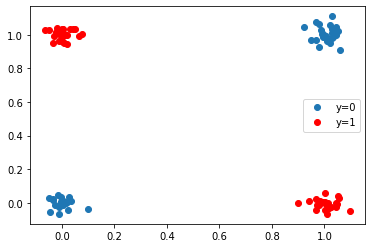

In [29]:
#create dataset
dataset = XOR_Data()
dataset.plot_stuff()

In [30]:
#Define the network with one hidden layer
class Net(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(Net,self).__init__()
    self.l1 = nn.Linear(D_in,H)
    self.l2 = nn.Linear(H,D_out)
    self.sigmoid = nn.Sigmoid()
  def forward(self,x):
    out1 = self.sigmoid(self.l1(x))
    y_pred = self.sigmoid(self.l2(out1))
    return y_pred

In [34]:
#define training method
def train_model(EPOCHS):
  LOSS = []
  ACCURACY = []
  for epoch in range(EPOCHS):
    for x,y in trainloader:
      y_pred = model(x)
      loss = criterion(y_pred,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    ACCURACY.append(accuracy(model,dataset))
    LOSS.append(loss.item())
    
  fig, ax1 = plt.subplots()
  color = 'tab:red'
  ax1.plot(LOSS, color=color)
  ax1.set_xlabel('epoch', color=color)
  ax1.set_ylabel('total loss', color=color)
  ax1.tick_params(axis='y', color=color)
  
  ax2 = ax1.twinx()  
  color = 'tab:blue'
  ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
  ax2.plot(ACCURACY, color=color)
  ax2.tick_params(axis='y', color=color)
  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  
  plt.show()

In [35]:
#model with one neuron
model = Net(2,1,1)

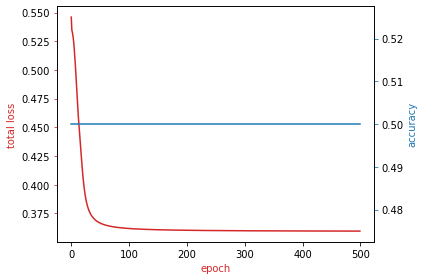

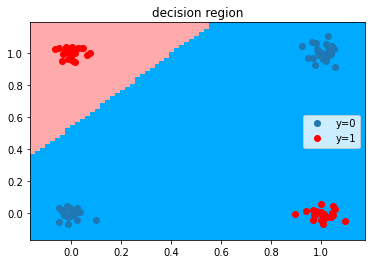

In [38]:
optimizer = optim.SGD(model.parameters(),lr = 0.1)
criterion = nn.BCELoss()
trainloader = DataLoader(dataset = dataset,batch_size=1)
train_model(500)
plot_decision_regions_2class(model,dataset)

In [39]:
#model with two neuron
model = Net(2,2,1)

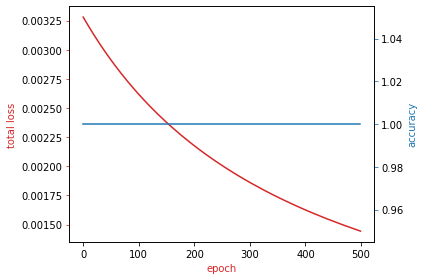

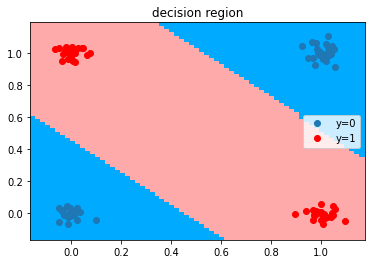

In [42]:
optimizer = optim.SGD(model.parameters(),lr = 0.1)
criterion = nn.BCELoss()
trainloader = DataLoader(dataset = dataset,batch_size=1)
train_model(500)
plot_decision_regions_2class(model,dataset)

In [43]:
#model with three neurons
model = Net(2,3,1)

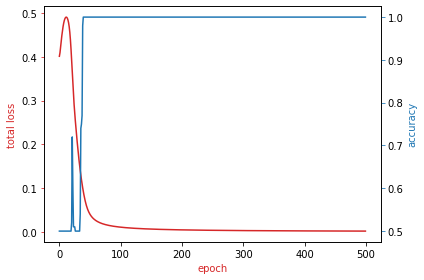

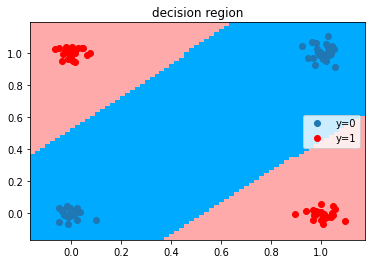

In [44]:
optimizer = optim.SGD(model.parameters(),lr = 0.1)
criterion = nn.BCELoss()
trainloader = DataLoader(dataset = dataset,batch_size=1)
train_model(500)
plot_decision_regions_2class(model,dataset)